# Plot precomputed sequence predictions and contribution scores
This notebook illustrates how to plot precomputed predictions and contribution scores for a given 5'UTR in the MPRA.

Make sure you have downloaded the precomputed contributions file before running this notebook.

In [1]:
import pickle
import sys

import matplotlib
import pandas

utils_dir = 'utils'
sys.path.append(utils_dir)
import custom_plots

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
matplotlib.rcParams['mathtext.default'] = 'regular'

## Load data
The following loads sequence metatada and predictions for all UTRs tested in the MPRA, and the precomputed contribution scores.

In [3]:
# Load data
mpra_df = pandas.read_csv(
    'full_model_evaluation/Zb_5UTR_MPRA_with_preds.tsv.gz',
    index_col=0,
    sep='\t',
)

mpra_df

,chr,strand,external_gene_name,utr_length,insert_length,n_uORFs,GC_content,mxfold,index,index_base,...,pred_test_log2_MRL_10hpf,pred_full_log2_MRL_10hpf,pred_test_Δlog2_X_2hpf,pred_full_Δlog2_X_2hpf,pred_test_Δlog2_X_4hpf,pred_full_Δlog2_X_4hpf,pred_test_Δlog2_X_6hpf,pred_full_Δlog2_X_6hpf,pred_test_Δlog2_X_10hpf,pred_full_Δlog2_X_10hpf
ENSDARG00000000001_ENSDART00000000004_19058_slc35a5_20318,chr9,-,slc35a5,103.0,103.0,2.0,52.427184,23.9,20318.0,20318,...,2.390045,2.553573,-1.719531,-1.708624,-0.710143,-0.665578,-1.793335,-1.837050,-1.989746,-2.020408
ENSDARG00000000018_ENSDART00000181044_14421_nrf1_72681,chr4,-,nrf1,134.0,134.0,0.0,61.940299,35.3,72681.0,72681,...,2.448878,2.415843,-1.891235,-1.980832,-0.591849,-0.552270,-2.007738,-1.982406,-1.125323,-1.193949
ENSDARG00000000019_ENSDART00000124452_14118_ube2h_27446,chr4,+,ube2h,178.0,178.0,1.0,46.629213,30.1,27446.0,27446,...,2.501041,2.379249,-1.884392,-1.935805,-0.474855,-0.408718,-2.229212,-2.221917,-0.678730,-0.704322
ENSDARG00000000068_ENSDART00000000069_2438_slc9a3r1a_113092,chr12,+,slc9a3r1a,152.0,152.0,0.0,46.052632,26.1,113092.0,113092,...,2.627780,2.763784,-2.367868,-2.355859,-0.430069,-0.409165,-2.052849,-2.026948,-0.662411,-0.576333
ENSDARG00000000069_ENSDART00000000070_12170_dap_20320,chr24,-,dap,153.0,153.0,1.0,47.058824,31.8,20320.0,20320,...,2.482960,2.497563,-2.452622,-2.273506,-0.449078,-0.530098,-2.020428,-2.029758,-1.015012,-0.949125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSDARG00000060397_ENSDART00000085051_231_hhip_26758.1,chr1,+,hhip,410.0,209.0,2.0,31.578947,26.3,26758.1,26758,...,1.053673,1.320685,-2.363133,-3.065505,-0.596964,-0.732703,-2.512594,-2.252490,-0.694722,-1.061540
ENSDARG00000098284_ENSDART00000170620_10459_ctxn1_29429.4,chr22,+,ctxn1,678.0,174.0,0.0,51.724138,41.2,29429.4,29429,...,2.446544,3.069664,-3.353687,-3.767259,-0.960340,-0.857212,-1.829986,-1.724766,-0.918232,-0.969787
ENSDARG00000103318_ENSDART00000161570_7325_mrpl3_86762,chr19,+,mrpl3,111.0,111.0,2.0,34.234234,12.5,86762.0,86762,...,3.249464,3.248826,-2.183509,-2.343830,-0.353026,-0.293256,-1.775180,-1.836341,-1.560418,-1.601856
ENSDARG00000036698_ENSDART00000053300_7697_znf865_21263.6,chr19,-,znf865,1305.0,197.0,4.0,31.979695,25.9,21263.6,21263,...,2.189054,2.129192,-3.107413,-3.142238,-0.903177,-0.738932,-1.897865,-1.976108,-1.214759,-0.988991


In [4]:
# Load contribution scores
# Dictionary, where keys are insert ids and values are numpy arrays
# with dimensions (n_model_outputs, max_seq_len, 4)

with open('contributions/contributions_ensemble_cnn_model.pickle', 'rb') as handle:
    contributions_dict = pickle.load(handle)
# assert set(data.index.to_list()) == set(contributions_dict.keys())
print(f"Contribution scores for {len(contributions_dict)} sequences loaded.")

Contribution scores for 17951 sequences loaded.


## Plot
Here, the predictions, measurements, and nucleotide contributions are plotted for an MPRA sequence whose ID is specified. A few interesting IDs are provided below as examples.

In [5]:
# seq_id_to_plot = 'ENSDARG00000063310_ENSDART00000092375_7676_oxr1b_89493' # High MRL, good kozak
# seq_id_to_plot = 'ENSDARG00000014420_ENSDART00000028610_13866_elavl3_40005.2' # High MRL, U-rich motif
# seq_id_to_plot = 'ENSDARG00000062445_ENSDART00000090310_6690_pias1b_65054' # Low MRL, uAUG
# seq_id_to_plot = 'ENSDARG00000044362_ENSDART00000065143_10332_unc119b_21540' # Increasing MRL, G-rich motif
seq_id_to_plot = 'ENSDARG00000060596_ENSDART00000085531_15499_prkaa1_21920' # Increasing MRL, CUCUCU motif
# seq_id_to_plot = 'ENSDARG00000099148_ENSDART00000172515_18501_bzw1b_29503' # Decreasing MRL, bad kozak

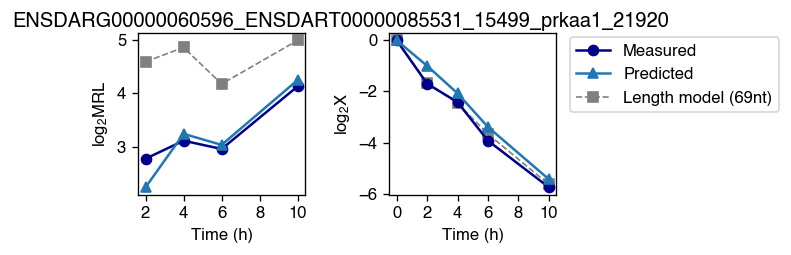

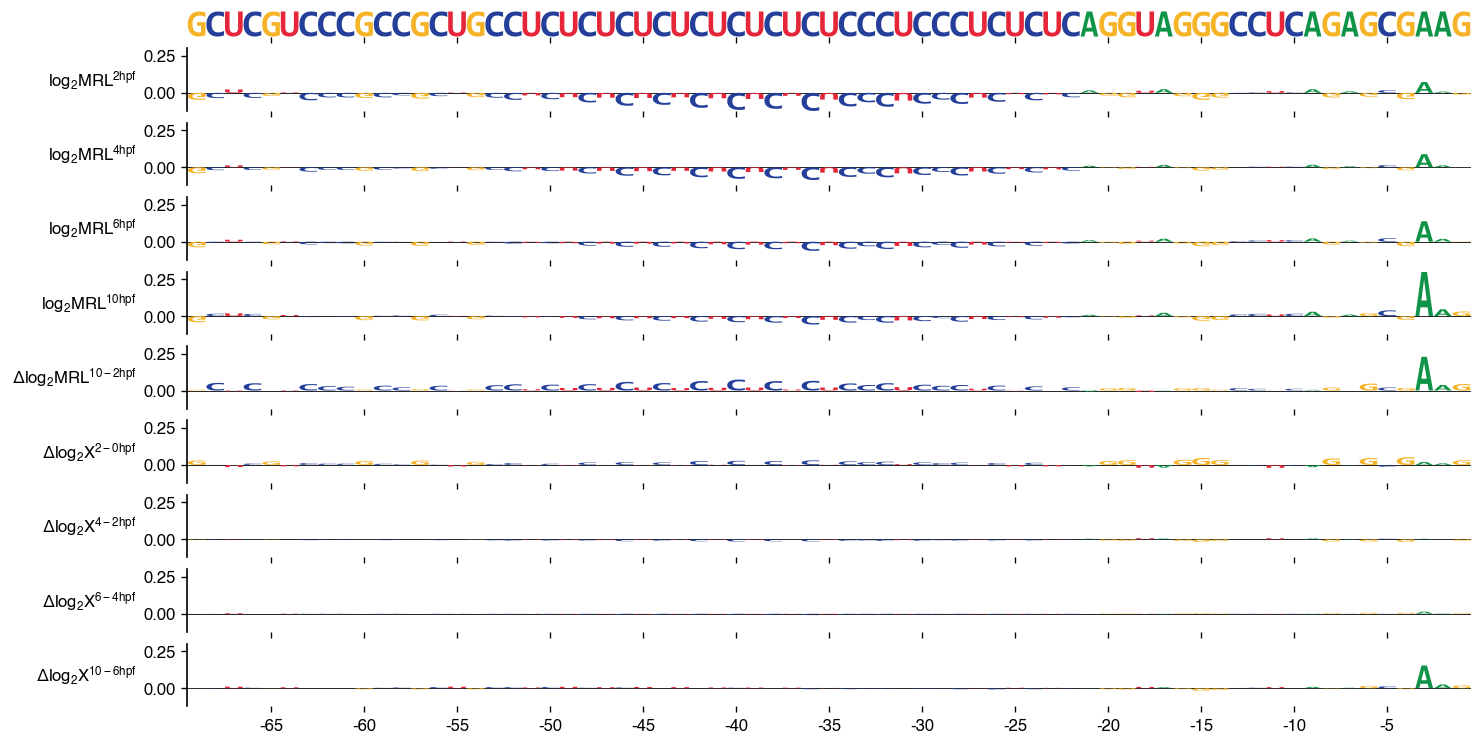

In [6]:
fig = custom_plots.plot_single_timecourse(
    mpra_df,
    seq_id_to_plot,
    mode='full',
    plot_delta_x=False,
    mrl_timeticks=[2, 4, 6, 8, 10],
    mrl_lim_auto=True,
    plot_x=True,
    x_lim_auto=True,
    x_timeticks=[0, 2, 4, 6, 8, 10],
    figsize=(4.5, 1.75),
    wspace=0.5,
)

fig = custom_plots.plot_contribution_scores(
    mpra_df,
    contributions_dict,
    seq_id_to_plot,
    # outputs_to_plot=['log2_MRL_2hpf', 'log2_MRL_10hpf', 'Δlog2_MRL_10-2hpf'],
)